# 1장 기계 학습 파이썬으로 시작하기

contents

기계 학습과 파이썬 : 꿈의 조합 

이 책이 알려주는 내용(과 알려주지 않는 내용) 

정체됐을 때 해야 할 작업  

시작 
* NumPy, SciPy, and Matplotlib 소개
* 파이썬 설치  
* NumPy와 효과적으로, SciPy와 지능적으로 적용하기 쉬운 데이터 만들기
* NumPy 배우기 
 * 인덱싱
 * 존재하지 않는 값 처리  
 * 실행 시간 비교 
* SciPy 배우기

첫 번째 기계 학습 애플리케이션 
* 데이터 읽기 
* 데이터 정리와 전처리 
* 적절한 모델과 학습 알고리즘 선택  
 * 모델을 만들기에 앞서  
 * 단순한 직선으로 시작하기   
 * 좀 더 복잡한 모델  
 * 일보후퇴, 이보전진 : 데이터 다시 보기
 * 훈련과 테스트
 * 최초 질문에 대답하기

# 기계 학습과 파이썬 : 꿈의 조합

기계학습이란? 
* 기계에게 몇 가지 예를 주고 작업을 수행하도록 가르치는 일

ML(기계학습)은 애자일하게
* 일반적인 ML은 분석 시 앞뒤 단계를 오가며 다양한 ML 알고리즘에 여러 버전의 입력 데이터를 적용해 시도

파이썬 쓰면 좋다
* 대화형, 동적타입, 쉽고 다양한 라이브러리
* 실행속도 희생

# 이 책이 알려주는 내용(과 알려주지 않는 내용)

알려주지 않는 것 - 정교한 여러 기계학습 알고리즘들에 대한 이론적 접근.

알려주는 것
1. 데이터 읽기와 정리
2. 입력 데이터의 탐구와 이해
3. 기계 학습 알고리즘을 위해 어떻게 최적으로 데이터를 나타낼지에 대한 분석
4. 적절한 모델과 학습 알고리즘 선택
5. 수행 정확도 측정

# 정체됐을 때 해야 할 작업

구글링 & 추천 사이트

* http://metaoptimize.com/qa
* https://stats.stackexchange.com
* https://stackoverflow.com
* Feenode의 #machinelearning
* http://www.TwoToReal.com

하지만, kaggle로 대동단결.(kaggle 블로그로 갑시다)
* http://blog.kaggle.com


# 시작

## NumPy, SciPy, Matplotlib 소개

## 파이썬 설치

## NumPy와 효과적으로, SciPy와 지능적으로 적용하기 쉬운 데이터 만들기

## NumPy 배우기

In [1]:
import numpy
numpy.version.full_version

'1.15.4'

In [2]:
import numpy as np
a = np.array([0,1,2,3,4,5])
a

array([0, 1, 2, 3, 4, 5])

In [3]:
a.ndim

1

In [4]:
a.shape

(6,)

In [5]:
b = a.reshape((3,2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [6]:
b.ndim

2

In [7]:
b.shape

(3, 2)

In [8]:
b[1][0] = 77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [9]:
a

array([ 0,  1, 77,  3,  4,  5])

In [10]:
a*2

array([  0,   2, 154,   6,   8,  10])

In [11]:
a**2

array([   0,    1, 5929,    9,   16,   25])

In [12]:
[1,2,3,4,5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [13]:
[1,2,3,4,5]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

### 인덱싱

In [14]:
a[np.array([2,3,4])]

array([77,  3,  4])

In [15]:
a>4

array([False, False,  True, False, False,  True])

In [16]:
a[a>4]

array([77,  5])

In [17]:
a[a>4] = 4

In [18]:
a

array([0, 1, 4, 3, 4, 4])

In [19]:
a.clip(0,3)

array([0, 1, 3, 3, 3, 3])

### 존재하지 않는 값 처리

In [20]:
c = np.array([1,2, np.NAN, 3, 4])
c

array([ 1.,  2., nan,  3.,  4.])

In [21]:
np.isnan(c)

array([False, False,  True, False, False])

In [22]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [23]:
np.mean(c[~np.isnan(c)])

2.5

### 실행시간 비교 

In [24]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in xrange(1000))',
                              number=10000)
   
print("Normal Python: %f sec"%normal_py_sec)

NameError: name 'xrange' is not defined

[파이썬] 파이썬 에러 NameError: name 'xrange' is not defined : range vs. xrange 차이점

출처: https://korbillgates.tistory.com/96 [생물정보학자의 블로그]

In [25]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',
                              number=10000)
   
print("Normal Python: %f sec"%normal_py_sec)

Normal Python: 1.354741 sec


In [26]:
naive_np_sec = timeit.timeit('sum(na*na)',
                             setup="import numpy as np; na=np.arange(1000)",
                             number=10000)
print("Naive NumPy: %f sec"%naive_np_sec)

Naive NumPy: 1.478119 sec


In [27]:
good_np_sec = timeit.timeit('na.dot(na)',
                            setup="import numpy as np; na=np.arange(1000)",
                            number=10000)
print("Good NumPy: %f sec"%good_np_sec)

Good NumPy: 0.023830 sec


In [28]:
a.dtype

dtype('int64')

In [29]:
np.array([1, "stringy"])

array(['1', 'stringy'], dtype='<U21')

In [30]:
np.array([1, "stringy", set([1,2,3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

## SciPy 배우기

In [31]:
import scipy, numpy

In [32]:
scipy.version.full_version

'1.1.0'

In [33]:
scipy.dot is numpy.dot

True

<img src='./img/tbl01_scipytoolbox.png'/>

## Cheatsheet

<img src='./img/ml_map.png'/>

[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

![scikit-learn](https://tensorflowkorea.files.wordpress.com/2017/01/scikit_learn_cheat_sheet_python.png)

![pandas](https://tensorflowkorea.files.wordpress.com/2017/01/pandaspythonfordatascience.png)

![numpy](https://tensorflowkorea.files.wordpress.com/2017/01/numpy_python_cheat_sheet.png)

![SciPy](https://tensorflowkorea.files.wordpress.com/2017/01/python_scipy_cheat_sheet_linear_algebra.png)

![matplotlib](https://tensorflowkorea.files.wordpress.com/2017/01/python_matplotlib_cheat_sheet.png)

pdf 버전은 여기-[scikit-learn](https://tensorflowkorea.files.wordpress.com/2017/01/scikit_learn_cheat_sheet_python.pdf), [pandas](https://tensorflowkorea.files.wordpress.com/2017/01/pandaspythonfordatascience.pdf), [numpy](https://tensorflowkorea.files.wordpress.com/2017/01/numpy_python_cheat_sheet.pdf), [SciPy](https://tensorflowkorea.files.wordpress.com/2017/01/python_scipy_cheat_sheet_linear_algebra.pdf), [matplotlib](https://tensorflowkorea.files.wordpress.com/2017/01/python_matplotlib_cheat_sheet.pdf)

# 첫 번째 기계 학습 애플리케이션

가상 창업 회사인 MLAAS. 
* 웹상에서 기계 학습 알고리즘을 제공하는 서비스를 함.
* 웹 요청을 처리하고자 기반 시설을 늘리려고 함
* 비싼 장비를 무턱대로 살 수는 없다.
* 현재 시스템은, 시간당 최대 100,000번의 요청을 처리할 수 있다.
* 최대로 가용하며 모든 요청을 완벽하게 처리하기 위해 앞으로 클라우드에 추가 장비를 설치해야 하는 시점 (시간당 100,000번을 알고 싶다.) 

## 데이터 읽기

데이터 설명 : web_traffic.tsv
* 지난달 통계 
* 탭으로 구분됨
* 시간당 요청 수
* 각 줄은 연속적으로 나열된 시간, 그 시간의 요청수


In [34]:
!head ./data/web_traffic.tsv

1	2272
2	nan
3	1386
4	1365
5	1488
6	1337
7	1883
8	2283
9	1335
10	1025


In [35]:
import scipy as sp
data = sp.genfromtxt("./data/web_traffic.tsv", delimiter="\t")

In [36]:
print(data.shape)

(743, 2)


In [37]:
data

array([[1.000e+00, 2.272e+03],
       [2.000e+00,       nan],
       [3.000e+00, 1.386e+03],
       ...,
       [7.410e+02, 5.392e+03],
       [7.420e+02, 5.906e+03],
       [7.430e+02, 4.881e+03]])

## 데이터 정리와 전처리

In [38]:
# 743개의 데이터를 시간과 특정시간 요청수를 나타내는 2개의 벡터로 나누자
x = data[:,0]
y = data[:,1]

In [39]:
# 시간 정보에 잘못된 값 nan이 얼마나 포함되어 있는가?
sp.sum(sp.isnan(y))

8

In [40]:
# 걸러내고, 유효 엔트기만 선별하자
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

<IPython.core.display.Javascript object>


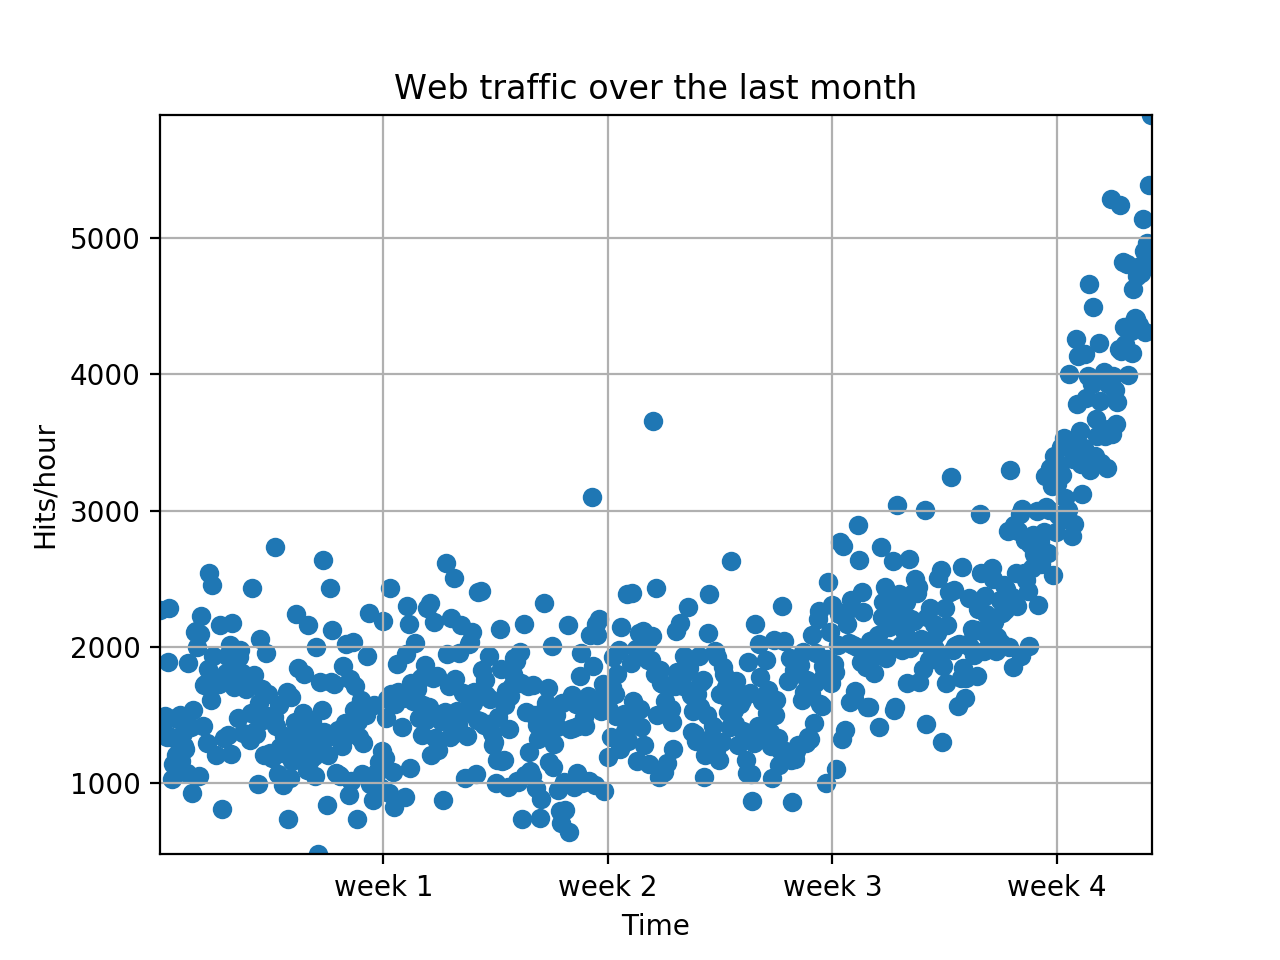

In [41]:
# 데이터 형태를 파악하기 위해 그래프를 그리자

# Python3에서 추가해야 할 부분
%matplotlib notebook

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

## 적합한 모델과 학습 알고리즘 선택

[질문] 서버는 들어오는 웹 트래피에 얼마 동안 대응할 수 있을까?
* 노이즈를 고려한 실제 모델 찾기
* 모델을 사용해 설비를 증설해야 할 시점

### 모델을 만들기에 앞서

용어들
* 모델 : 이론적 근사치 - 단순한 모델로 시작
* approximation error - 근사치 오차
* squared distance - 거리 제곱 오차 측정치

In [42]:
# 학습된 모델 함수 f에 대한 오차를 구하는 함수(squared distance 사용)
def error(f, x, y) : 
    return sp.sum((f(x)-y)**2)

### 단순한 직선으로 시작하기

In [43]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

In [44]:
fp1

array([  2.59619213, 989.02487106])

In [45]:
residuals

array([3.17389767e+08])

In [46]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.33977807


<IPython.core.display.Javascript object>


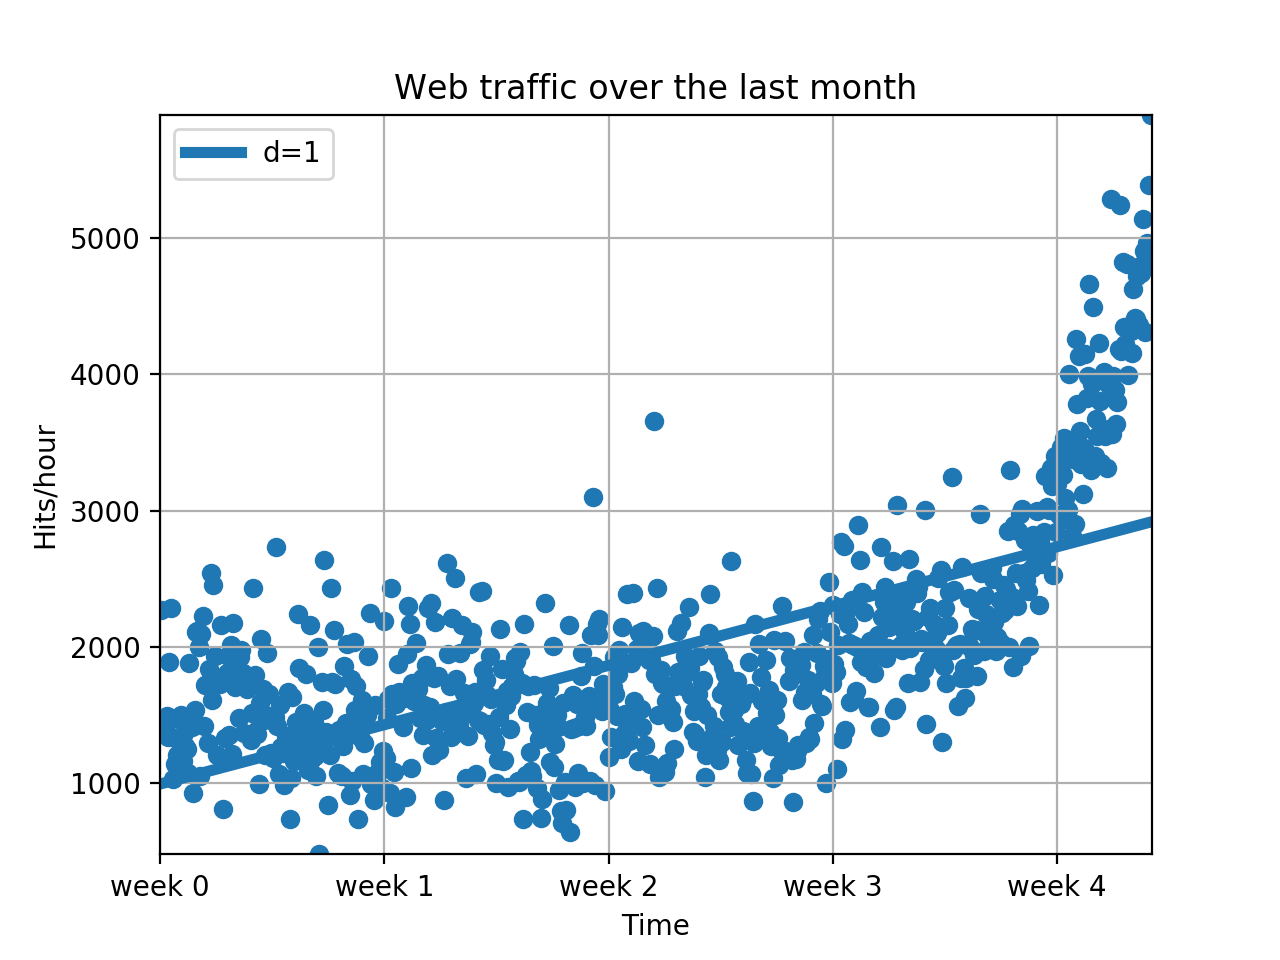

In [47]:
%matplotlib notebook
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000) 
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.grid()
plt.show()

### 좀 더 복잡한 모델

In [48]:
# 2차원 다항식 모델
f2p = sp.polyfit(x, y, 2)
f2p

array([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03])

In [49]:
f2 = sp.poly1d(f2p)
error(f2, x, y)

179983507.8781792

<IPython.core.display.Javascript object>


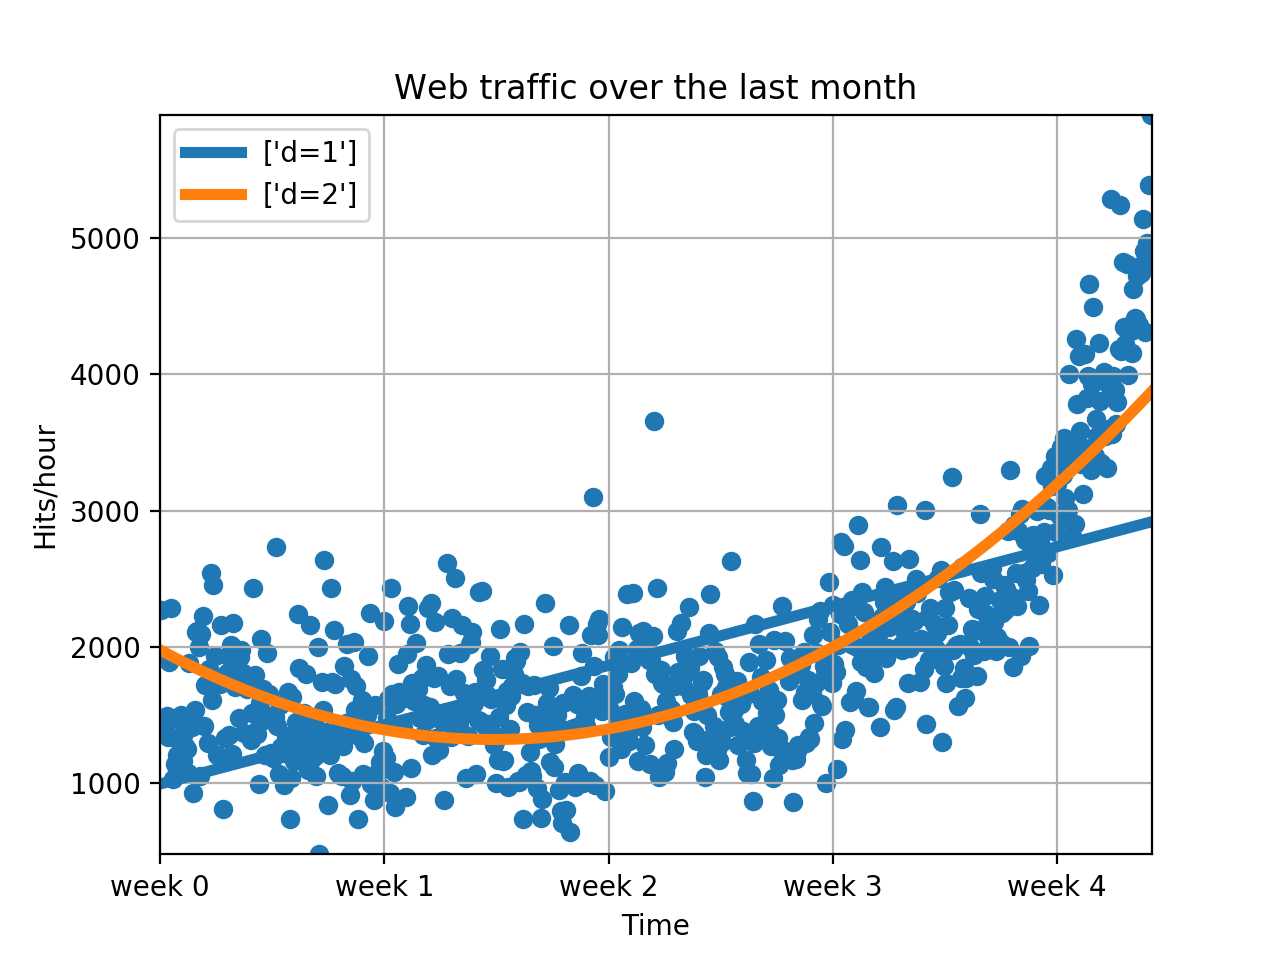

In [50]:
%matplotlib notebook
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000)

plt.plot(fx, f1(fx), linewidth=4)
#plt.legend(["d=%i" % f1.order],loc="upper left")

plt.plot(fx, f2(fx), linewidth=4)
plt.legend([["d=%i" % f1.order],["d=%i" % f2.order]], loc="upper left")

plt.grid()
plt.show()

In [51]:
# 실습 - 차수 3으로 도전

# 3차원 다항식 모델
f3p = sp.polyfit(x, y, 3)
f3p

array([ 3.04960132e-05, -2.35893797e-02,  4.94226019e+00,  1.33328797e+03])

In [52]:
# 에러는?
f3 = sp.poly1d(f3p)
error(f3, x, y)

139350144.03172523

In [53]:
# 실습 - 차수 10으로 도전
# 에러는?
f10p = sp.polyfit(x, y, 10)
f10p
f10 = sp.poly1d(f10p)
error(f10, x, y)

121942326.36347426

In [54]:
# 실습 - 차수 100으로 도전
# 에러는?
f100p = sp.polyfit(x, y, 100)
f100p
f100 = sp.poly1d(f100p)
error(f100, x, y)

/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:578: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


109452384.92468244

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


<IPython.core.display.Javascript object>


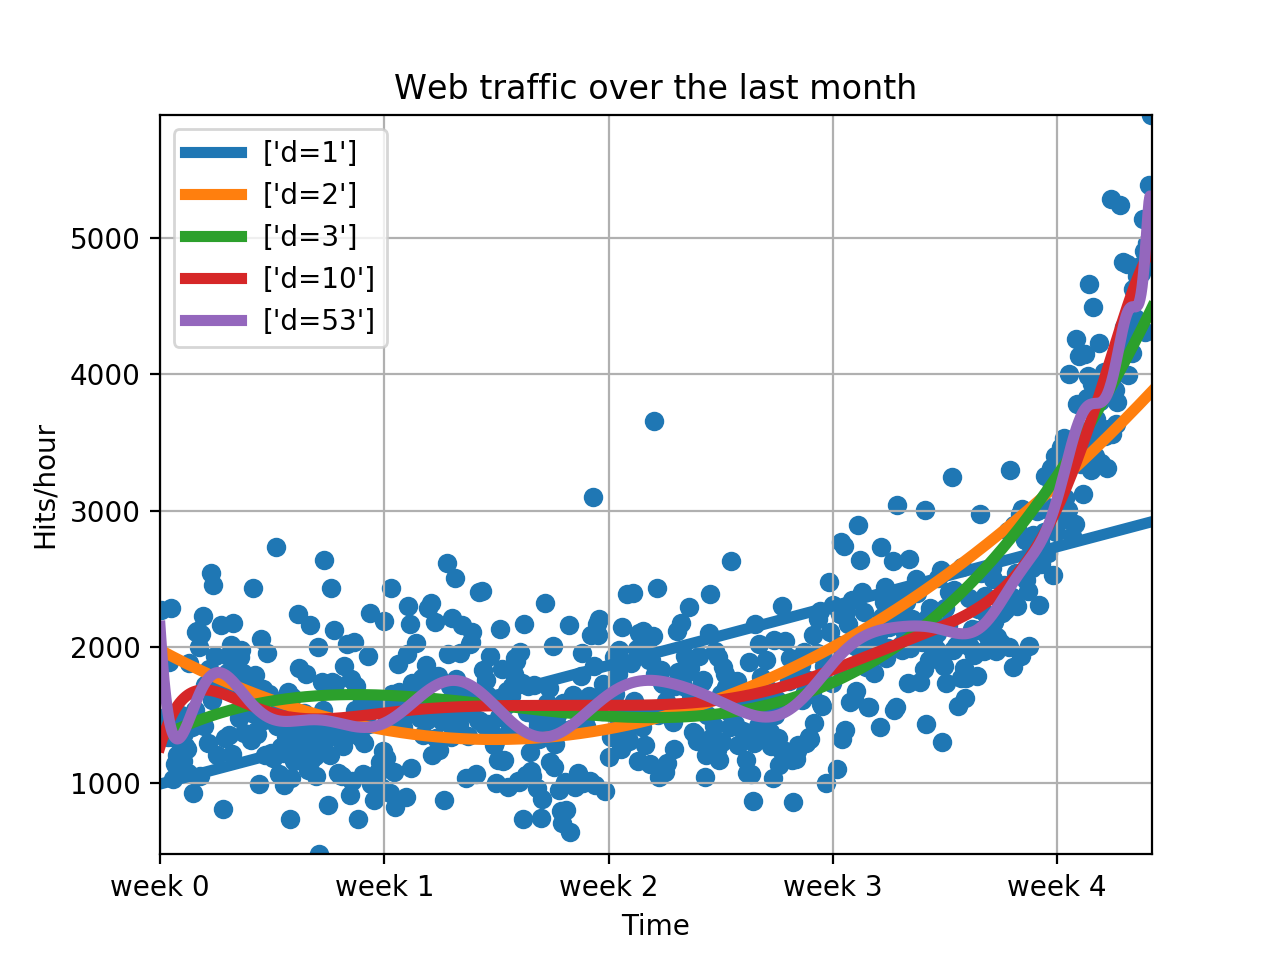

In [55]:
%matplotlib notebook
f3p = sp.polyfit(x, y, 3)
f3 = sp.poly1d(f3p)

f10p = sp.polyfit(x, y, 10)
f10 = sp.poly1d(f10p)

f100p = sp.polyfit(x, y, 100)
f100 = sp.poly1d(f100p)


plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000)

plt.plot(fx, f1(fx), linewidth=4)
plt.plot(fx, f2(fx), linewidth=4)
plt.plot(fx, f3(fx), linewidth=4)
plt.plot(fx, f10(fx), linewidth=4)
plt.plot(fx, f100(fx), linewidth=4)

plt.legend([["d=%i" % f1.order],
            ["d=%i" % f2.order],
            ["d=%i" % f3.order],
            ["d=%i" % f10.order],
            ["d=%i" % f100.order]
            ], 
           loc="upper left")

plt.grid()
plt.show()

In [56]:
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363474
Error d=53: 109452384.924682


#### overfitting 과적합

overfillting(과적합)

* 위의 결과를 보면 10차 이상은 너무 굴곡이 많음. 
* 이는 모델이 너무 많은 데이터에 fitting 됨
* 주요 데이터 뿐만 아니라 노이즈까지 반영하는 것을 overfitting이라고 한다.

다음 중에 하나 선택해야 한다.

* 적합화된 다항식 모델 중 하나를 선택해야 할지
* 스플라인spline 같은 좀 더 복잡한 모델로 바꿔야 할지
* 데이터를 다르게 분석하고 다시 시작해야 할지


#### 일보후퇴, 일보전진 : 데이터 다시 보기

데이터를 다시 보자

<IPython.core.display.Javascript object>


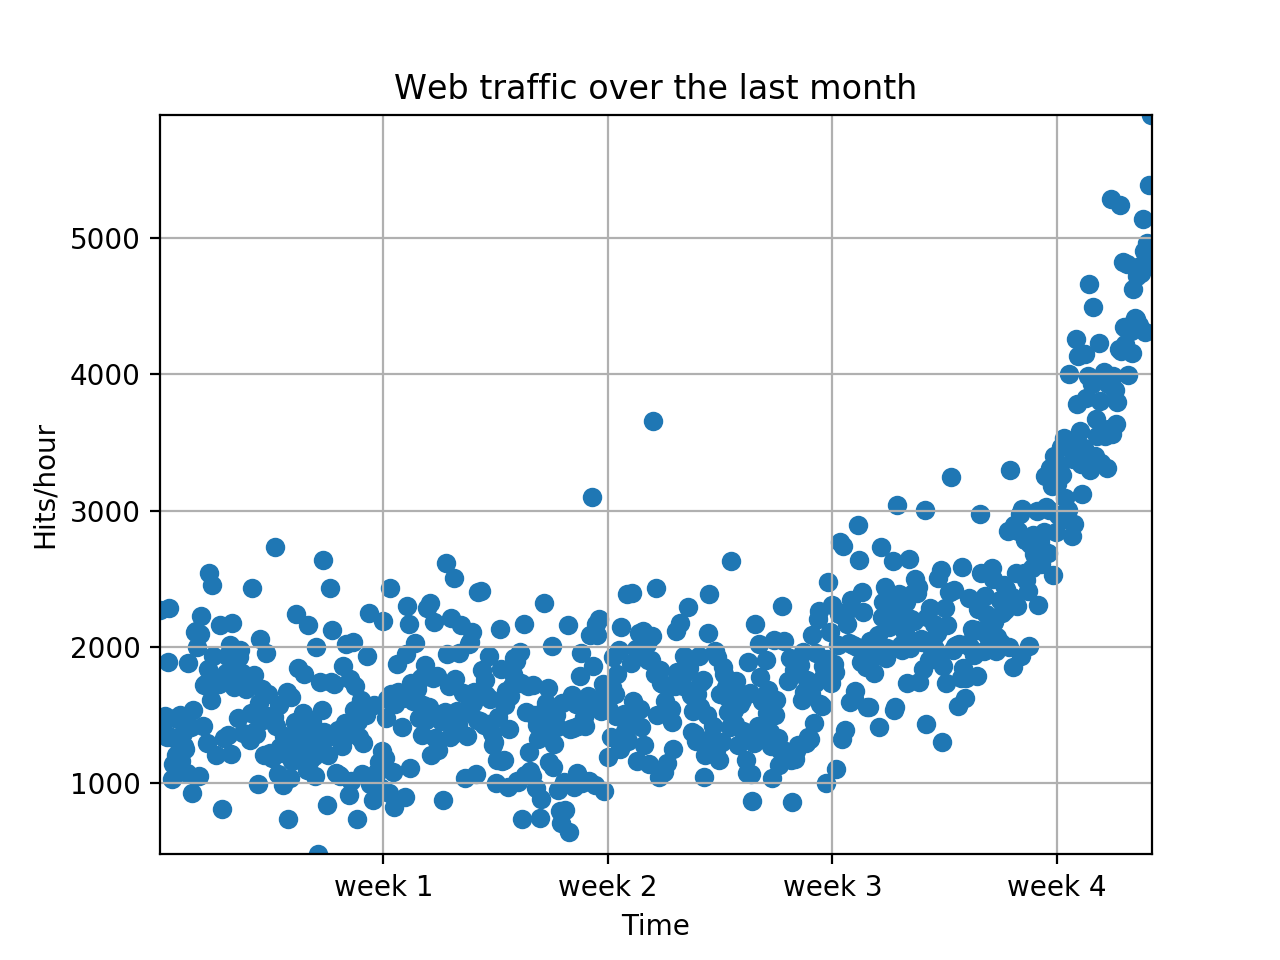

In [57]:
# 데이터 형태를 파악하기 위해 그래프를 그리자
%matplotlib notebook
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

* 3주차와 4주차 사이에 변곡점이 있다.
* 3.5주차를 기준으로 데이터를 둘로 나누고 두 선을 따로 훈련하자
* 3주차까지 첫 번째 직선을 훈련하고, 나머지를 두 번째 직선으로 훈련하자

In [58]:
# 시간으로 변곡점을 계산한다.
# inflection을 정수 처리 하지 않으면 아래 코드에서 'TypeError: slice indices must be integers or None or have an __index__ method' 발생
inflection = int(3.5 * 7 * 24)
inflection

588

<IPython.core.display.Javascript object>


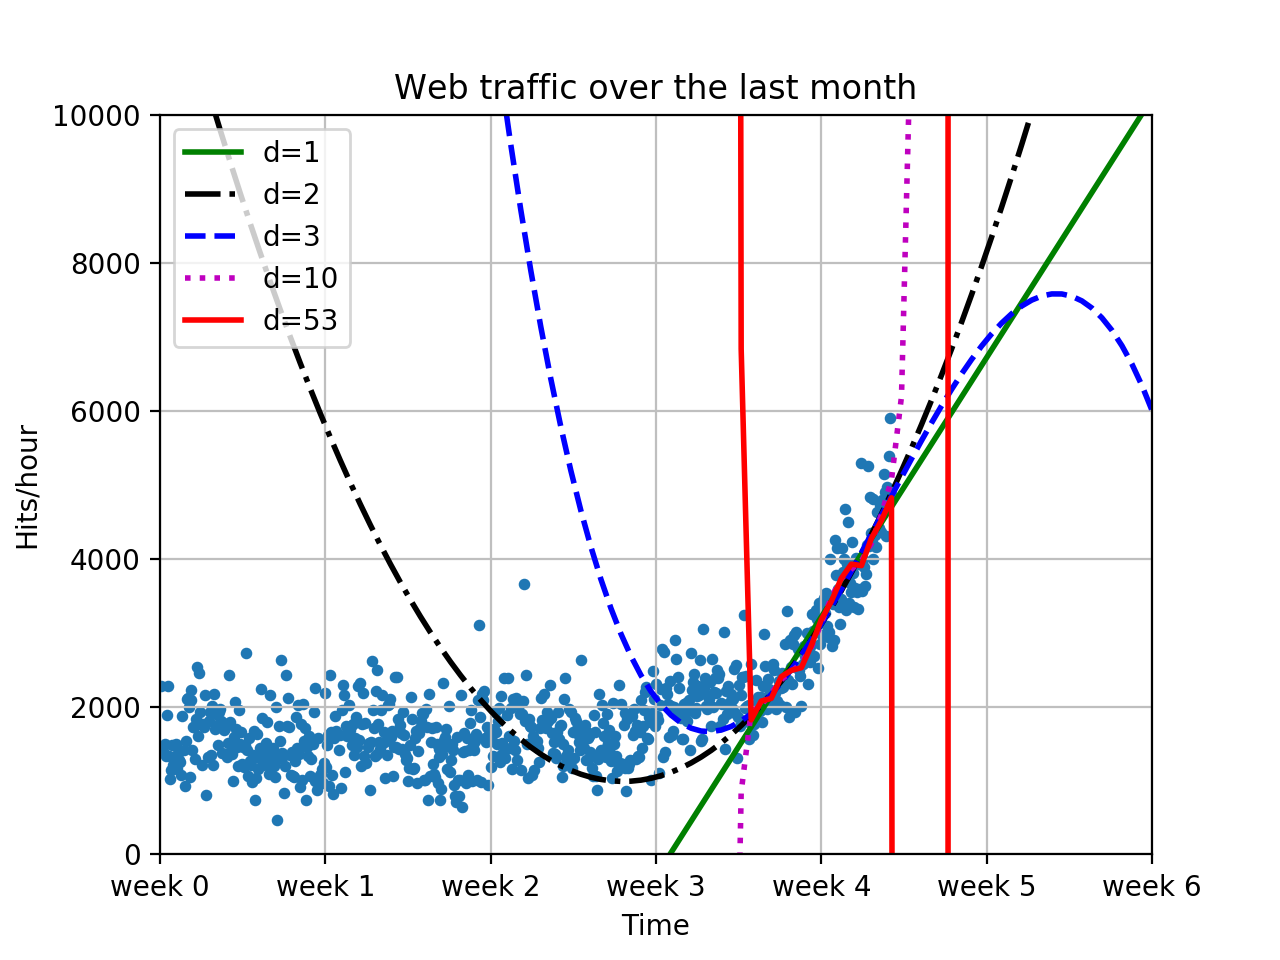

In [59]:
%matplotlib notebook

# 첫번째 직선 ( 변곡점 이전 데이터)
xa = x[:inflection]
ya = y[:inflection]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))

plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i'%w for w in range(10)])

fax = sp.linspace(0, xa[-1], 1000)

plt.plot(fax, fa(fax), linewidth=4)

plt.legend([["d=%i" % fa.order],
            ], 
           loc="upper left")

plt.autoscale(tight=True)
plt.grid()
plt.show()

In [60]:
# 두번째 직선 (변곡점 이후 데이터)
xb = x[inflection:]
yb = y[inflection:]

fb = sp.poly1d(sp.polyfit(xb, yb, 1))

plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i'%w for w in range(10)])

fax = sp.linspace(0, xa[-1], 1000)
fbx = sp.linspace(xb[0], xb[-1], 1000)

plt.plot(fax, fa(fax), linewidth=4)
plt.plot(fbx, fb(fbx), linewidth=4)

plt.legend([["d=%i" % fa.order],
            ["d=%i" % fb.order]
            ], 
           loc="upper left")

plt.autoscale(tight=True)
plt.grid()
plt.show()

In [61]:
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" %(fa_error + fb_error))

Error inflection=132950348.197616


#### 미래를 예측해보자!

어느 모델을 써야 하는가?

* 두 직선의 결합은 이전 모델보다 overfitting을 피한 것 처럼 보인다.
* 하지만 여전히 고차모델보다는 오차가 높다.
* 왜 직선 모델을 신용하는가?

In [62]:
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

def plot_models(x, y, models, mx=None, ymax=None, xmin=None):
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
# 변경된 점: The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
#    plt.ylim(ymin=0)
    plt.ylim(bottom=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.show()

In [63]:
# 이전 모델들의 예측력 그래프 그리기
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


예측 결과 

* 고차 다항식 모델 - 과적합(overfitting). 회사의 미래가 밝지 않다. 데이터를 너무 잘 반영해서 미래의 예측도 쓸모없어졌다
* 저차 다항식 모델 - 과소적합(under-fitting). 역시 좋지 않다. 데이터를 제대로 반영하지 못하는듯.

In [64]:
# 마지막 주의 데이터만으로 훈련하기
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))

print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100], 
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.733070
Error d=53: 18300664.870091


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


결과 

* 직선 모델의 경우, 마지막 주의 데이터만 학습하면 더 예측력이 높아진다(차수 낮은 모델들)
* 고차 모델의 경우, 예측력이 더 엉망이 된다.
* 그런데도 오차만으로 모델 판단 기준을 정하면 고차모델을 택해야 하는 것처럼 나온다.

어떻게 해야하나??!!!


In [65]:
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.733070
Error d=53: 18300664.870091


### 훈련과 테스트

가령, 모델의 정확도를 낮추는 미래의 데이터를 갖고 있더라도, 단지 결과인 근사치 오차를 바탕으로 모델을 선택할 수 있어야 한다.

홀드아웃 데이터(학습 데이터와 테스트 데이터를 분리한다) 방식!

* 마지막 주의 데이터에서
* 테스트용 데이터로 쓰기 위해 일부 데이터를 뺀다(test data set)
* 그리고 그 나머지 데이터로 학습해서 모델을 만든다(training data set)
* 학습 결과로 나온 모델의 성능을 테스트 데이터로 측정한다. (오차 구함)


In [66]:
frac = 0.3
split_idx = int(frac * len(xb))
split_idx

44

In [67]:
shuffled = sp.random.permutation(list(range(len(xb))))
shuffled

array([ 49,  74,  82,  17,  85,  66,  54,  76,   6,  46,  16,  30, 121,
       103,  18, 139,  69,  91, 118, 127,  62, 145,  64,  96,   4,  22,
       104,  65,  21, 142, 105, 130,  33,  60,  98, 122, 126,  57,  10,
       108,  81, 143,  44,  93,  97,  37,   7,   3,  34,  32,  89,  88,
        75,  52,  19, 111, 132,  58,  23,   9,  35,  53, 135,  80, 119,
       107, 100,  31,  67, 106,  50,  63,  13,  86,  29,  26,  77,  25,
       133, 146, 123,  27,  11, 114,  15,  92, 113,   8, 140,  43,  55,
        42,   5,  59,  38, 112,  28,  14,  39,  12,  48, 134, 117,  79,
        47,  73, 115, 124,   0,  90,   2, 144, 110,  41,  51,  94,  20,
        87,  71,  72, 125,  36,   1,  61, 138, 101, 131,  68,  83, 120,
       109,  45,  24, 128, 116,  84,  40, 141,  95,  78, 129,  56,  99,
        70, 136, 137, 102])

In [68]:
test = sorted(shuffled[:split_idx])
test

[4,
 6,
 10,
 16,
 17,
 18,
 21,
 22,
 30,
 33,
 44,
 46,
 49,
 54,
 57,
 60,
 62,
 64,
 65,
 66,
 69,
 74,
 76,
 81,
 82,
 85,
 91,
 93,
 96,
 98,
 103,
 104,
 105,
 108,
 118,
 121,
 122,
 126,
 127,
 130,
 139,
 142,
 143,
 145]

In [69]:
train = sorted(shuffled[split_idx:])
train

[0,
 1,
 2,
 3,
 5,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 19,
 20,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 47,
 48,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 59,
 61,
 63,
 67,
 68,
 70,
 71,
 72,
 73,
 75,
 77,
 78,
 79,
 80,
 83,
 84,
 86,
 87,
 88,
 89,
 90,
 92,
 94,
 95,
 97,
 99,
 100,
 101,
 102,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 120,
 123,
 124,
 125,
 128,
 129,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 140,
 141,
 144,
 146]

In [70]:
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100], 
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


그래프상으로 d=2와 d=3이 예측력이 제일 좋아보인다.

테스트 데이터에 모델을 적용해서 오차를 구해보자.

In [71]:
print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Test errors for only the time after inflection point
Error d=1: 8497911.206180
Error d=2: 7118947.817795
Error d=3: 7220397.658469
Error d=10: 7140900.600362
Error d=53: 7374570.117748


오차 계산 결과 d=2 모델이 가장 좋은 것으로 !!

### 최초의 질문에 대답하기

시간당 100,000 요청이 언제 들어올까? 장비를 언제를 기준으로 구매해야 할까?

* 모델인 2차 다항식의 y값이 100,000이 되는 x를 찾으면 된다. = 다항식의 근 찾기
* 다항식에서 100,000을 빼고 근을 구한다.

In [72]:
fb2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print(fb2)

         2
0.05254 x - 49.46 x + 1.263e+04


In [73]:
print(fb2-100000)

         2
0.05254 x - 49.46 x - 8.737e+04


In [74]:
from scipy.optimize import fsolve
reached_max = fsolve(fb2-100000, 800)/(7*24)
reached_max

array([10.97266649])

In [75]:
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 10.972666


예측결과 : 10주 뒤엔 최대 수용치(시간당 100,000번 접속)에 도달할 것이다.

# 정리

전형적인 기계 학습 작업은

* 데이터 정제와 이해에 대부분의 시간을 보낸다.
* 올바른 실험 준비가 필요하다.
* 훈련과 테스트가 섞이지 않아야 한다.


# 감사합니다.